In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

In [2]:
# import some data to play with
iris = datasets.load_iris()

### Mapping target labels to target names

In [3]:
species_dict = dict(zip(range(0, len(iris.target_names)), iris.target_names))

iris_species = list((map(lambda x : species_dict[x], iris.target)))

### Explore the data

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data, columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
 
y = pd.DataFrame(iris.target, columns = ['Targets'])

### How many clusters?
You are given an array points of size 150x4. As seen above, our features are sepal length (cm), sepal width (cm), petal length (cm), petal width (cm).

matplotlib.pyplot has already been imported as plt.

Make a scatter plot by passing x.Sepal_Length and x.Sepal_Width to the plt.scatter() function. Make a scatter plot by passing x.Petal_Length and x.Petal_Width to the plt.scatter() function. Call the plt.show() function to show your plot. How many clusters do you see?

Text(0.5, 1.0, 'Petal')

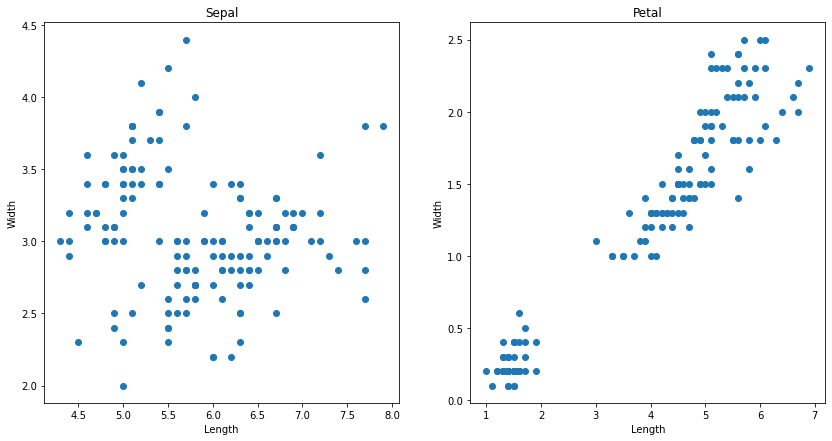

In [9]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Plot Sepal
plt.subplot(1, 2, 1) # Creating subplots (1st subplot of 1 row, 2 columns)

# Produce a scatter plot for the sepal length and width 
plt.scatter(x.Sepal_Length, x.Sepal_Width)
plt.xlabel('Length')
plt.ylabel('Width')

plt.title('Sepal')
 
plt.subplot(1, 2, 2)
# Produce a scatter plot for the petal length and width 
plt.scatter(x.Petal_Length, x.Petal_Width)
plt.xlabel('Length')
plt.ylabel('Width')

plt.title('Petal')

## Dealing with the size of data with Principal Component Analysis
The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

PCA and Dimensionality Reduction
Often, the desired goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a (k)-dimensional subspace (where $k

Summary of Approach
Instantiate (or create) the specific machine learning model you want to use Fit the model to the training data Use the model to make predictions
* Standardise data
* Instantiate PCA()
* Fit PCA to the training data with the .fit
* Use PCA to transform the training data
* Standardising your data
* Motivation
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Unscaled data can also slow down or even prevent the convergence of many gradient-based estimators. There are various methods to normalize data. For this tutorial we are going to use the StandardScaler from scikit-learn.

In [11]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [12]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Fit_transform scaler to 'X'
X_norm = scaler.fit_transform(x)

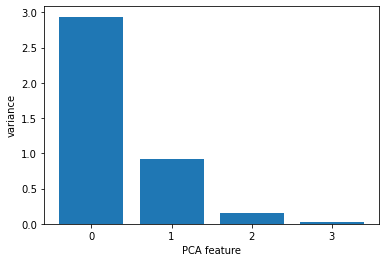

In [13]:
# Fit pca to 'X'
pca.fit(X_norm)

# Plot the explained variances
features = range(0, pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#### Dimension reduction of the iris dataset
In a previous exercise, you found the "intrinsic dimension" to be some  k<4  of the iris dataset. Now use PCA for dimensionality reduction of the iris dataset, retaining only the 2 most important components.

We have already been scaled above, and is available as X_norm.

Instructions
* Create a PCA instance called pca with n_components=2.
* Use the .fit() method of pca to fit it to the scaled iris data X_norm.
* Use the .transform() method of pca to transform the X_norm. Assign the result to pca_features.

In [14]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(X_norm)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_norm)

# Print the shape of pca_features
print(pca_features.shape)

(150, 2)


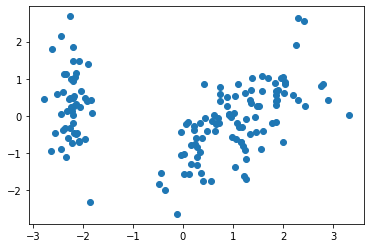

In [15]:
plt.scatter(pca_features[:, 0], pca_features[:, 1])

#### What is Kmeans clustering?
Kmeans clustering is an unsupervised learning technique to automatically group data into coherent clusters.

Data: The model will take in training data Output: Cluster centroids and the labels for each data point. The labels tell us which clusters they belong to.

A summary of the algorithm
Randomly intialize K cluster centroids.

While the centroid positions are not the same,

For each data point, say x, find the cluster centroid closest to x.
Update cluster centers using data points assigned to them (Calculate the mean)

In [16]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X_norm)

# Determine the cluster labels of new_points: labels
labels = model.labels_

# Print cluster labels of new_points
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each iris species coincides with each cluster label. Assign the result to ct 

In [17]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(pca_features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'species': iris_species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          39         14
2             0          11         36


#### Instructions
* For each of the given values of k, perform the following steps:
* Create a KMeans instance called model with k clusters.
* Fit the model to the grain data samples.
* Append the value of the inertia_ attribute of model to the list inertias.
* The code to plot ks vs inertias has been written for you, so hit 'Shift + Enter' to see the plot!

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


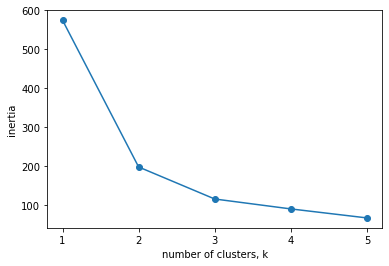

In [19]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()